<a href="https://colab.research.google.com/github/Gonzalo-Ortega/Stereotypical-Behavior-Classification/blob/main/Machine_Learning_demos_Gonzalo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation

from sklearn.datasets import make_blobs

FIGURES_PATH = '/content/gdrive/MyDrive/Uni/5°. Quinto/CSIC/TFG Software/Repository/Stereotypical-Behavior-Classification/LaTeX/figures'

In [2]:
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Analisis functions

In [3]:
def sort_similarity_matrix_by_cluster(similarity_mat, clusters):
  cluster_amount = len(set(clusters))
  points_amount = len(similarity_mat)
  aux_mat = np.zeros((points_amount, points_amount))

  i = 0
  for cluster in range(cluster_amount):
    for point in range(points_amount):
      if clusters[point] == cluster:
        aux_mat[i, :] = similarity_mat[point, :]
        i += 1

  i = 0
  sorted_mat = np.zeros((points_amount, points_amount))
  for cluster in range(cluster_amount):
    for point in range(points_amount):
      if clusters[point] == cluster:
        sorted_mat[:, i] = aux_mat[:, point]
        i += 1

  return sorted_mat

def figure_similarity_heat_map_matrices(similarity_mat, sorted_mat):
  fig = plt.figure(figsize=(15, 5))
  fig.suptitle('Similarity matrix')

  ax = fig.add_subplot(121)
  im1 = ax.imshow(similarity_mat, cmap='jet', interpolation='nearest')
  ax.set_aspect('equal')
  ax.set_xlabel('Time bin i')
  ax.set_ylabel('Time bin j')
  ax.set_title('Original')
  fig.colorbar(im1, ax=ax, fraction=0.04)

  ax = fig.add_subplot(122)
  im2 = ax.imshow(sorted_mat, cmap='jet', interpolation='nearest')
  ax.set_aspect('equal')
  ax.set_xlabel('Time bin i')
  ax.set_title('Sorted by cluster')
  fig.colorbar(im2, ax=ax, fraction=0.04)

In [126]:
def figure_scatter_data(data, assignment=None, save_name=False):
  fig = plt.figure(figsize=(5, 5))
  ax = fig.add_subplot(111)

  if assignment is not None:
    ax.scatter(data[:, 0], data[:, 1], c=assignment, cmap='Spectral', alpha=0.5)
  else:
    ax.scatter(data[:, 0], data[:, 1], c='grey', alpha=0.5)

  ax.set_xlabel('Primera componente')
  ax.set_ylabel('Segunda componente')

  if save_name:
    fig.savefig(f"{FIGURES_PATH}/{save_name}.pdf")

def figure_scatter_data_3d(data, assignment=None, save_name=False):
  fig = plt.figure(figsize=(5, 5))
  ax = fig.add_subplot(111, projection='3d')

  if assignment is not None:
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=assignment, cmap='Spectral', alpha=0.7)
  else:
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='grey', alpha=0.7)

  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')

  if save_name:
    fig.savefig(f"{FIGURES_PATH}/{save_name}.pdf")

def figure_color_principal_components(pca, save_name=False):
  fig = plt.figure(figsize=(10, 5))
  ax = fig.add_subplot(111)

  mappable = ax.imshow(pca.components_[:2], cmap='Blues')
  plt.yticks([0, 1], ['Primera componente', 'Segunda'])
  plt.xticks([0, 1, 2], ['X', 'Y', 'Z'])
  plt.colorbar(mappable)
  ax.set_xlabel('Dimensiones originales')
  ax.set_ylabel('Componentes principales')

  # Add text annotations for each tile
  for i in range(pca.components_[:2].shape[0]):
      for j in range(pca.components_[:2].shape[1]):
          ax.text(j, i, f'{pca.components_[:2][i, j]:.2f}', ha='center', va='center', color='black')

  if save_name:
    fig.savefig(f"{FIGURES_PATH}/{save_name}.pdf")

## Generate test data sets

In [49]:
X, y = make_blobs(n_samples=100, centers=4, n_features=3, random_state=0)
print(X.shape)
print(y)

(100, 3)
[0 0 1 3 3 3 0 3 1 1 3 0 2 2 3 3 1 2 1 0 3 1 2 0 3 2 3 3 2 1 2 1 0 1 0 2 0
 1 1 3 1 2 2 0 2 2 2 1 2 1 1 2 2 0 1 2 0 0 3 0 0 0 3 1 2 0 1 2 1 3 3 2 3 0
 3 0 0 1 3 0 1 3 1 0 1 3 1 0 3 2 2 2 3 2 3 1 0 0 2 3]


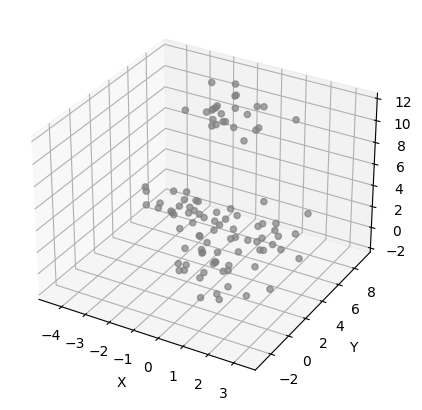

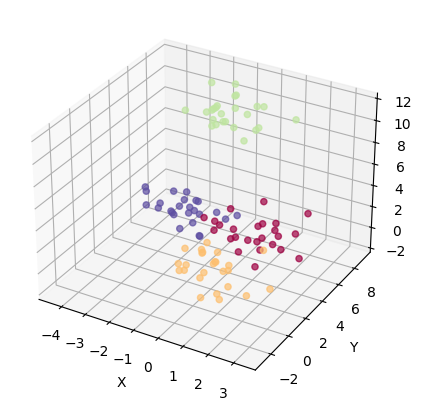

In [106]:
figure_scatter_data_3d(X, save_name='artificial-data')
figure_scatter_data_3d(X, assignment=y, save_name='artificial-data-labeled')

In [97]:
scaler = StandardScaler()
scaler.fit(X)
features_scaled = scaler.transform(X)

pca = PCA(n_components=3)
pca.fit(features_scaled)
X_reduced = pca.transform(X)

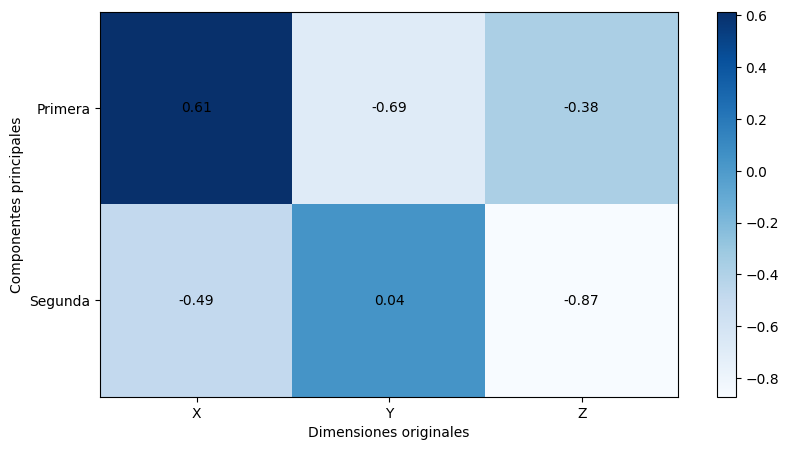

In [127]:
figure_color_principal_components(pca, save_name='pca-color-ponderation')

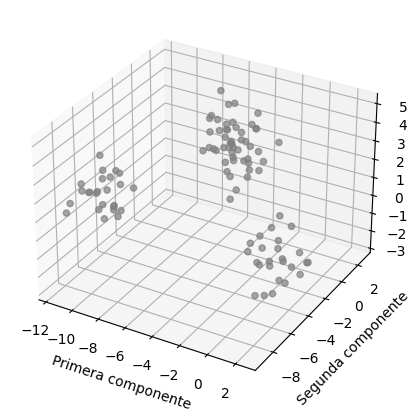

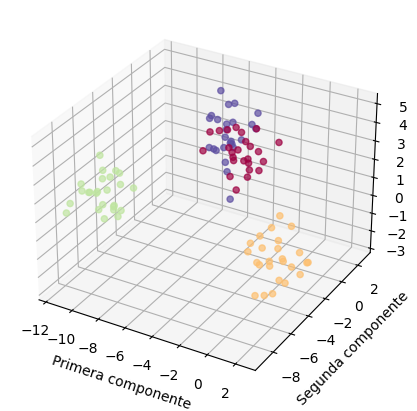

In [123]:
figure_scatter_data_3d(X_reduced, save_name='pca-3d')
figure_scatter_data_3d(X_reduced, assignment=y, save_name='pca-3d-labeled')

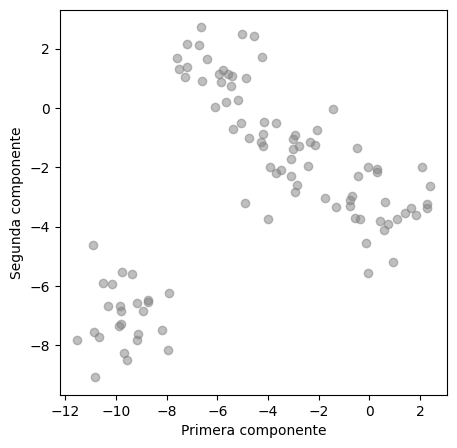

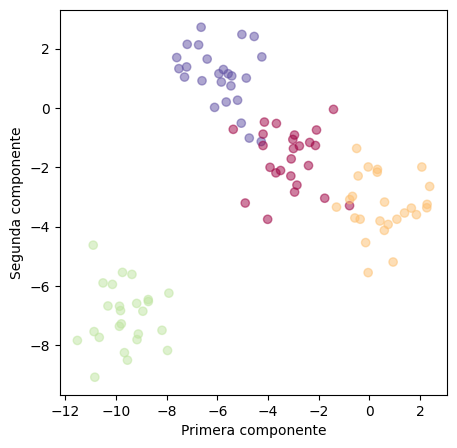

In [124]:
figure_scatter_data(X_reduced, save_name='pca')
figure_scatter_data(X_reduced, assignment=y, save_name='pca-labeled')

## K-means

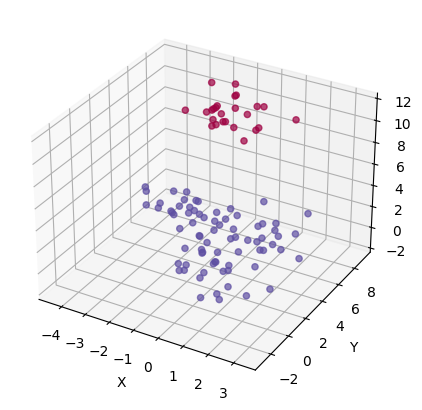

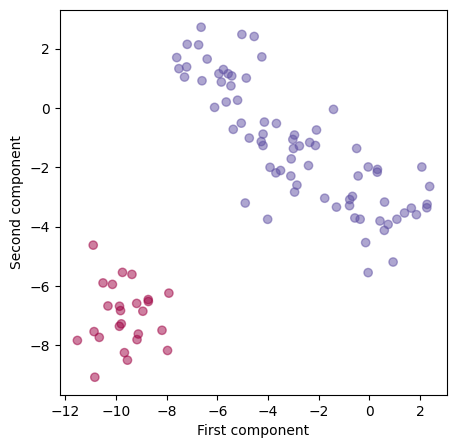

In [115]:
kmeans = KMeans(n_clusters=2, n_init="auto")
kmeans_assigment = kmeans.fit_predict(X)

figure_scatter_data_3d(X, assignment=kmeans_assigment, save_name='kmeans-3d')
figure_scatter_data(X_reduced, assignment=kmeans_assigment, save_name='kmeans-pca')

## Agglomerative clustering

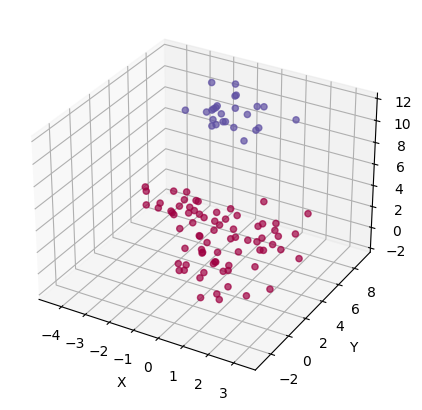

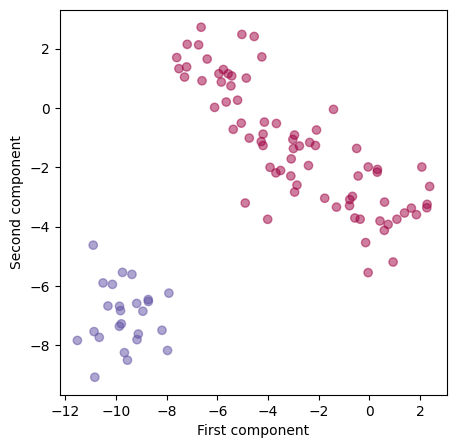

In [116]:
agg = AgglomerativeClustering()
agg_assigment = agg.fit_predict(X)

figure_scatter_data_3d(X, assignment=agg_assigment, save_name='agglomerative-3d')
figure_scatter_data(X_reduced, assignment=agg_assigment, save_name='aglomerative-pca')

## Affinity propagation

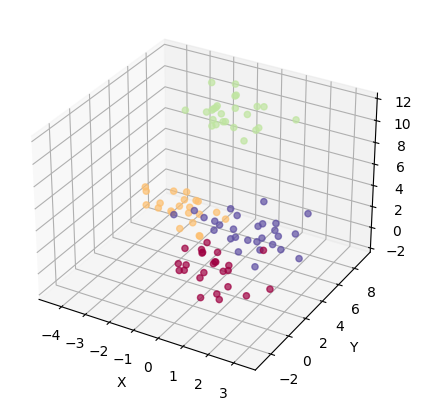

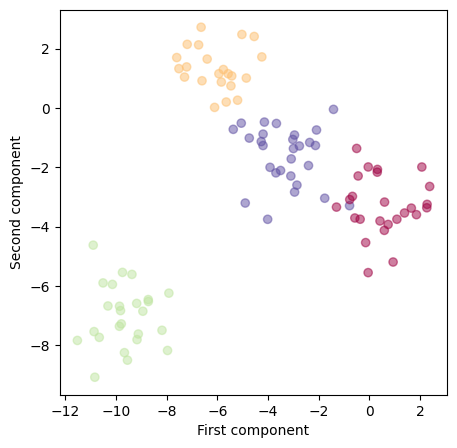

In [117]:
aff = AffinityPropagation()
aff_assigment = aff.fit_predict(X)

figure_scatter_data_3d(X, assignment=aff_assigment, save_name='affinity-3d')
figure_scatter_data(X_reduced, assignment=aff_assigment, save_name='affinity-pca')

### Similarity matrix

[0 0 0 0 0 0 0 0 0 0]
[ 0.         -0.90554634 -0.90554634 -0.90554634 -0.90554634 -0.37620231
 -0.37620231 -0.37620231 -0.37620231 -0.90554634]
[-0.90554634  0.         -0.37620231 -0.37620231 -0.37620231 -0.90554634
 -0.90554634 -0.90554634 -0.90554634 -0.37620231]
[-0.90554634 -0.37620231  0.         -0.37620231 -0.37620231 -0.90554634
 -0.90554634 -0.90554634 -0.90554634 -0.37620231]
[-0.90554634 -0.37620231 -0.37620231  0.         -0.37620231 -0.90554634
 -0.90554634 -0.90554634 -0.90554634 -0.37620231]
[-0.90554634 -0.37620231 -0.37620231 -0.37620231  0.         -0.90554634
 -0.90554634 -0.90554634 -0.90554634 -0.37620231]
[-0.37620231 -0.90554634 -0.90554634 -0.90554634 -0.90554634  0.
 -0.37620231 -0.37620231 -0.37620231 -0.90554634]
[-0.37620231 -0.90554634 -0.90554634 -0.90554634 -0.90554634 -0.37620231
  0.         -0.37620231 -0.37620231 -0.90554634]
[-0.37620231 -0.90554634 -0.90554634 -0.90554634 -0.90554634 -0.37620231
 -0.37620231  0.         -0.37620231 -0.90554634]
[-

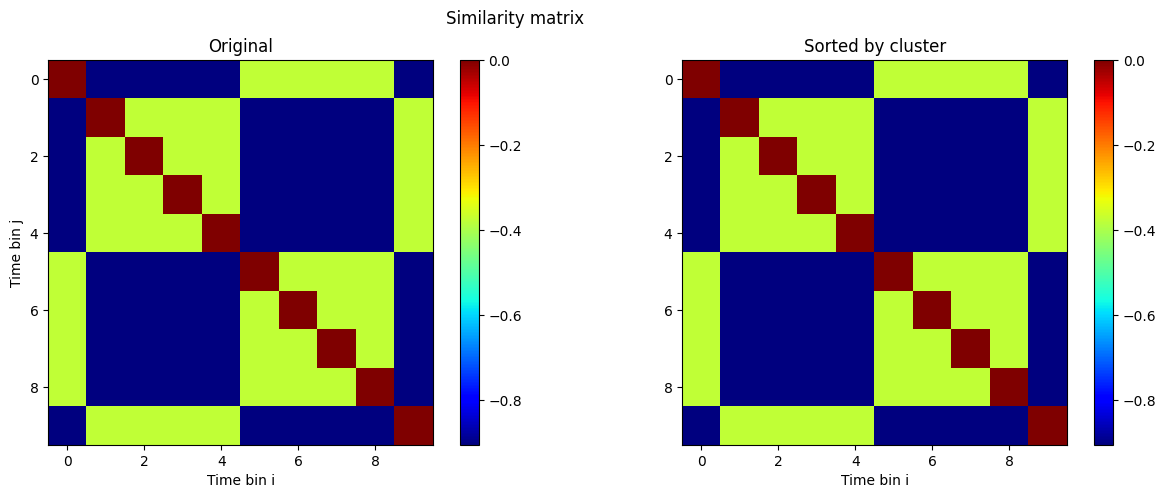

In [ ]:
distance_mat = np.array([[0, 5, 5, 5, 5, 1, 1, 1, 1, 5],
                         [5, 0, 1, 1, 1, 5, 5, 5, 5, 1],
                         [5, 1, 0, 1, 1, 5, 5, 5, 5, 1],
                         [5, 1, 1, 0, 1, 5, 5, 5, 5, 1],
                         [5, 1, 1, 1, 0, 5, 5, 5, 5, 1],
                         [1, 5, 5, 5, 5, 0, 1, 1, 1, 5],
                         [1, 5, 5, 5, 5, 1, 0, 1, 1, 5],
                         [1, 5, 5, 5, 5, 1, 1, 0, 1, 5],
                         [1, 5, 5, 5, 5, 1, 1, 1, 0, 5],
                         [5, 1, 1, 1, 1, 5, 5, 5, 5, 0]], dtype=float)

similarity_matrix = np.exp(-distance_mat / np.std(distance_mat)) -1


clustering = AffinityPropagation(damping=0.9, max_iter=400, affinity='precomputed', preference=-1)
clustering.fit(similarity_matrix)

# print(similarity_matrix)
print(clustering.labels_)
for row in similarity_matrix:
  print(row)

sorted_matrix = sort_similarity_matrix_by_cluster(similarity_matrix, clustering.labels_)
figure_similarity_heat_map_matrices(similarity_matrix, sorted_matrix)
# print(sorted_matrix)
